# chapter 4. 평가지표
1. 정확도(accuracy)가 왜 위험한지 설명한다.
2. 불균형 데이터에서 혼동행렬(TP/TN/FP/FN)을 읽는다.
3. 정밀도/재현율/F1이 각각 무엇을 벌주고(오탐/놓침) 무엇을 보상하는지 정리한다.
4. 임계값(threshold)을 바꾸면 지표가 어떻게 움직이는지 이해한다.
5. ROC-AUC, PR-AP가 무엇을 요약하는지, 언제 무엇을 보는지 구분한다.

오늘 사용할 지표 빠르게 요약

| 지표 | 의미 | 언제 중요한가 |
|------|------|-------------|
| **정확도(Accuracy)** | 전체 중 맞춘 비율 | 클래스가 균형일 때 |
| **정밀도(Precision)** | 양성 예측 중 실제 양성 | 오탐을 줄여야 할 때 (스팸) |
| **재현율(Recall)** | 실제 양성 중 찾은 비율 | 누락을 줄여야 할 때 (암) |
| **F1** | Precision과 Recall의 균형 | 둘 다 중요할 때 |
| **ROC-AUC** | 전체 임곗값에서 분류력 | 균형 데이터 성능 요약 |
| **PR-AP** | 양성 기준 분류력 | 불균형 데이터 성능 요약 |

## Part 1. 정확도란 무엇이고 왜 함정이 되나
정확도(Accuracy)는 전체 예측 중 맞춘 비율이다.

$ Accuracy= \frac {맞춘 개수​} {전체 개수}$

클래스(y값)가 균형일 때는 직관적이지만, 불균형 데이터에서는 착시가 강하게 생긴다.

예시:\
양성(1)이 1%인 데이터에서, 무조건 0만 예측해도 정확도는 99%가 된다.\
하지만 양성(1)을 하나도 못 잡는 모델이다.

## Part 2. 불균형 데이터 예시에서 생기는 문제
불균형 데이터에서는 정확도만으로 모델을 평가하면 위험하다.\
정확도가 높아도 양성을 거의 못 잡는 모델이 나오기 때문이다.\
이때는 혼동행렬을 바탕으로 밀도/재현율/F1을 함께 보고, 필요하면 PR-AP 같은 지표로 성능을 요약한다.

## part 3 혼동행렬(confusion matrix): 수식보단 개념 기준으로 외우기
혼동행렬은 이진 분류의 예측 결과를 2×2로 정리한 표다\
정확도는 "맞춘 비율"만 보여주지만, 혼동행렬은 "어떤 종류로 틀렸는지(오탐/놓침)"를 바로 보여준다.

- FP: 오탐(실제 0인데 1로 예측)
- FN: 놓침(실제 1인데 0으로 예측)

### 먼저 정해야 하는 것: Positive(관심 클래스)
분류 지표는 Positive(관심 클래스)를 먼저 정하고 해석해야 한다.\
보통 1을 Positive로 두지만, 문제에 따라 바뀔 수 있다.

- 예시
    - 스팸 탐지라면 Positive=스팸(1)
    - 질병 탐지라면 Positive=질병(1)

> 대부분의 실습에서는 1 = Positive(P), 0 = Negative(N)로 둔다. (문제에 따라 바뀔 수 있음)

### 혼동행렬 표 구조(암기 포인트)
혼동행렬은 "행 = 실제(정답), 열 = 예측"으로 읽는다고 정해두면 헷갈림이 줄어든다.

|                     | **예측 0 (Negative)** | **예측 1 (Positive)** |
| ------------------- | ------------------: | ------------------: |
| **실제 0 (Negative)** |              **TN** |              **FP** |
| **실제 1 (Positive)** |              **FN** |              **TP** |

### TP/TN/FP/FN 뜻(한 줄 정의)
- TP (True Positive) — 진실 양성 11\
    - Positive(1)라고 예측했는데 실제도 Positive(1) → 맞춘 1\
- TN (True Negative) — 진실 음성 00\
    - Negative(0)라고 예측했는데 실제도 Negative(0) → 맞춘 0
- FP (False Positive) — 거짓 양성 = 오탐 01\
    - Positive(1)라고 예측했는데 실제는 Negative(0) → 없는 걸 있다고 함
- FN (False Negative) — 거짓 음성 = 놓침 10\
    - Negative(0)라고 예측했는데 실제는 Positive(1) → 있는 걸 없다고 함


- 해석방법
    - TP가 많다: 관심 대상(1)을 잘 잡아낸다 (양성 탐지를 많이 성공)
    - TN가 많다: 관심 아닌 것(0)을 잘 걸러낸다 (음성 판정을 많이 성공)
    - FP가 많다: 관심 아닌데(0) 관심 있다고(1) 오탐이 많다 (0을 1로 잘못 판단)
    - FN가 많다: 관심 있는데(1) 관심 없다고(0) 놓침이 많다 (1을 0으로 잘못 판단)

예시설명\
메일 10개가 있고, 스팸=1, 정상=0 이라고 하자.
- 실제 스팸(1): 4개
- 실제 정상(0): 6개

|      | 예측 0 | 예측 1 |
| ---- | --- | --- |
| 실제 0 | TN=5 | FP=1 |
| 실제 1 | FN=1 | TP=3 |

- 모델의 예측 결과
    - 스팸을 스팸이라 맞춤: 3개 → TP=3
    - 정상을 정상이라 맞춤: 5개 → TN=5
    - 정상인데 스팸이라 함: 1개 → FP=1
    - 스팸인데 정상이라 함: 1개 → FN=1



```
confusion_matrix(y_true, y_pred, labels=[0,1]) # TP/TN/FP/FN을 담은 2×2 표를 만든다
## labels=[0,1]로 고정하는게 핵심

tn, fp, fn, tp = cm.ravel() # 혼동행렬에서 핵심 4개 숫자를 바로 뽑아 빠르게 해석한다.

classification_report(y_true, y_pred, ...) : 혼동행렬 기반으로 계산되는 precision / recall / f1 / support를 한 번에 출력한다.
```

In [1]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report

# 예시 데이터 (스팸=1, 정상=0)
# y_true: 정답 라벨(실제값)
y_true = np.array([1, 1, 1, 1,  0, 0, 0, 0, 0, 0])

# y_pred: 모델 예측 라벨(예측값)
# 이 예측은 결과적으로 TP=3, FN=1, TN=5, FP=1이 되도록 구성됨
y_pred = np.array([1, 1, 1, 0,  0, 0, 0, 0, 0, 1])

# 1) 혼동행렬 계산
# labels=[0,1]로 "행/열 순서"를 고정하는 게 핵심이다.
cm = confusion_matrix(y_true, y_pred, labels=[0, 1])

# 2) (선택) 사람이 읽기 좋은 형태로 TN/FP/FN/TP를 라벨링해서 확인
# 혼동행렬을 볼 때 결국 이 네 칸이 핵심이다.
ann = np.array([
    [f"TN={cm[0,0]}", f"FP={cm[0,1]}"],
    [f"FN={cm[1,0]}", f"TP={cm[1,1]}"]
])

# 3) (추천) 숫자만 바로 뽑아서 요약하는 방식
# labels=[0,1]로 고정했을 때만 안전하게 쓸 수 있다.
tn, fp, fn, tp = cm.ravel()
print(f"TN={tn}, FP={fp}, FN={fn}, TP={tp}\n")

# 4) 정밀도/재현율/F1 요약 출력
print("classification report")
print(classification_report(y_true, y_pred, digits=3, zero_division=0))

TN=5, FP=1, FN=1, TP=3

classification report
              precision    recall  f1-score   support

           0      0.833     0.833     0.833         6
           1      0.750     0.750     0.750         4

    accuracy                          0.800        10
   macro avg      0.792     0.792     0.792        10
weighted avg      0.800     0.800     0.800        10



## Part 4. 핵심지표: Precision / Recall / F1
Precision(정밀도)은 1이라고 찍은 것의 품질이다. FP(오탐)를 벌준다.\
Recall(재현율)은 실제 1을 얼마나 놓치지 않고 잡았나이다. FN(놓침)을 벌준다.\
F1은 정밀도와 재현율을 하나로 요약한다. 둘 중 하나가 낮으면 크게 깎인다.

| 지표        | 공식                | 의미                        |
| --------- | ----------------- | ------------------------- |
| Accuracy<br>(정확도) |  $(TP + TN) / 전체$   | 전체 중 맞춘 비율                |
| Precision<br>(정밀도) | $TP / (TP + FP) $   | 1이라 예측한 것 중 진짜 1  <br> (FP가 많으면 떨어짐)        |
| Recall<br>(재현율)    | $TP / (TP + FN)$    | 실제 1 중에서 찾아낸 비율  <br> (FN이 많으면 떨어짐)         |
| F1        | $2TP / (2TP + FP + FN)$ | Precision/Recall 균형(조화평균) |

### 이렇게 기억해보자(오탐/높침 관점)
- Precision(정밀도): 내가 1이라고 말한 것들 중 진짜 1이 얼마나 되나?
    - 높다 → FP가 적다 → 오탐이 적다
    - 스팸 필터에서 "정상 메일을 스팸 처리"가 싫으면 Precision이 중요해진다.
- Recall(재현율): 진짜 1을 얼마나 놓치지 않고 잡아내나?
    - 높다 → FN이 적다 → 놓침이 적다
    - 암 진단처럼 "진짜 양성을 놓치는 것"이 치명적이면 Recall이 중요해진다.
- F1: Precision과 Recall을 동시에 잘해야 올라간다.
    - 둘 중 하나가 낮으면 F1도 낮다.
    - "오탐도 싫고, 놓침도 싫다"면 F1로 균형을 본다.


### 핵심정리
- Accuracy: 전체 중 맞춘 비율
- Precision: 1로 예측한 것 중 진짜 1 비율(FP가 많으면 하락)
- Recall: 실제 1 중 잡아낸 비율(FN이 많으면 하락)
- F1: Precision/Recall을 하나로 요약(둘 중 하나가 낮으면 크게 깎임)

- 간단 해석
    - FP가 치명적이면 Precision 중심
    - FN이 치명적이면 Recall 중심
    - 둘 다 중요하면 F1로 균형

In [2]:
# 혼동행렬 기반으로 계산되는 precision / recall / f1 / support를 한 번에 출력한다.
print(classification_report(
    y_true,             # 실제 정답 라벨(보통 y_test)
    y_pred,             # 모델 예측 라벨(보통 model.predict(X_test) 결과)
    digits=3,           # 소수점
    zero_division=0     # 예측이 한쪽으로 쏠려 분모가 0이 되는 경우(예: TP+FP=0) 에러 대신 0으로 처리
))
# zero_division?
# classification_report는 precision/recall 같은 비율을 계산한다.
# 어떤 상황에서는 분모가 0이 될 수 있다. 이를 처리하는게 zero_division

              precision    recall  f1-score   support

           0      0.833     0.833     0.833         6
           1      0.750     0.750     0.750         4

    accuracy                          0.800        10
   macro avg      0.792     0.792     0.792        10
weighted avg      0.800     0.800     0.800        10



0 행: 클래스 **0을 0으로 판단/분리**하는 성능 (0을 Positive로 놓고 계산한 지표처럼 출력됨)\
1 행: 클래스 1(보통 Positive)을 잡는 성능

- Precision: 1로 예측한 것 중 진짜 1 비율(FP가 많으면 하락)
- Recall: 실제 1 중 잡아낸 비율(FN이 많으면 하락)
- f1-score: Precision/Recall을 하나로 요약(둘 중 하나가 낮으면 크게 깎임)
- support: 각 클래스의 실제 개수(0은 6개, 1은 4개) → 데이터 불균형 여부 바로 확인

===============

- accuracy: 전체 10개 중 80% 맞춤
- macro avg: 클래스 0과 1을 동일 가중치(반반) 로 평균\
→ 불균형일 때 **소수 클래스 성능**이 묻히는 걸 덜어줌
- weighted avg: support(개수)로 **가중 평균**\
→ **다수 클래스 영향이 커**서 전체 체감 성능에 가깝게 나옴

## Part 5. 임계값(threshold)
분류모델은 보통 클래스(1일 확률)를 바로 0/1로 내지 않고, 확률 점수를 낸다.\
ex) 이 메일이 스팸일 확률 = 0.7
이 확률을 어디서 자를지 정하는 기준이 임곗값(threshold)이다.

기본적으로 0.5를 기준으로 잡는다. (업무목표과 상황에 따라서 달라진다)\
확률 ≥ threshold → 1(Positive)\
확률 < threshold → 0(Negative)

### 임계값을 바꾼다면?
- 임계값 낮춤(0.3)
    - 더 쉽게 1로 판정 → 양성 예측 증가
    - FN 감소(놓침 줄어듦) → Recall 증가
    - FP 증가(오탐 늘어남) → Precision 감소(대체로)

- 임계값을 높임(0.7) : 확실할 때만 양성
    - 더 빡세게 1로 판정 → 양성 예측 감소
    - FP 감소(오탐 줄어듦) → Precision 증가(대체로)
    - FN 증가(놓침 늘어남) → Recall 감소

|   임계값   | Recall | Precision | 의미|
| ---- | ---: | ---: | ---: |
| 낮춤(0.3)  | 재현율 ↑ | 정밀도 ↓ | 더 많이 양성으로 잡음 (FN(놓침)↓, FP(오탐)↑) |
| 높임(0.7) | 재현율 ↓ | 정밀도 ↑ | 확실할 때만 양성 (FP(오탐)↓, FN(놓침)↑) |

>정리하면\
threshold를 낮추면 대체로 Recall↑(FN↓), Precision↓(FP↑)로 간다.\
threshold를 높이면 대체로 Precision↑(FP↓), Recall↓(FN↑)로 간다.

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import precision_score, recall_score, confusion_matrix

# 스팸=1, 정상=0
y_true = np.array([1, 1, 1, 1,  0, 0, 0, 0, 0, 0])

proba = np.array([0.90, 0.80, 0.70, 0.40,  0.20, 0.10, 0.30, 0.05, 0.15, 0.60])

threshold = 0.5
y_pred = (proba >= threshold).astype(int)

cm = confusion_matrix(y_true, y_pred, labels=[0, 1])
tn, fp, fn, tp = cm.ravel()
print(f"threshold={threshold}")
print(f"TN={tn}, FP={fp}, FN={fn}, TP={tp}\n")

print("classification report")
print(classification_report(y_true, y_pred, digits=3, zero_division=0))

threshold=0.5
TN=5, FP=1, FN=1, TP=3

classification report
              precision    recall  f1-score   support

           0      0.833     0.833     0.833         6
           1      0.750     0.750     0.750         4

    accuracy                          0.800        10
   macro avg      0.792     0.792     0.792        10
weighted avg      0.800     0.800     0.800        10



In [19]:
for thr in [0.3, 0.5, 0.7]:
    y_pred = (proba >= thr).astype(int)

    cm = confusion_matrix(y_true, y_pred, labels=[0, 1])
    tn, fp, fn, tp = cm.ravel()
    print(f"threshold={threshold}")
    print(f"TN={tn}, FP={fp}, FN={fn}, TP={tp}\n")

    print("classification report")
    print(classification_report(y_true, y_pred, digits=3, zero_division=0))
    print()

threshold=0.5
TN=4, FP=2, FN=0, TP=4

classification report
              precision    recall  f1-score   support

           0      1.000     0.667     0.800         6
           1      0.667     1.000     0.800         4

    accuracy                          0.800        10
   macro avg      0.833     0.833     0.800        10
weighted avg      0.867     0.800     0.800        10


threshold=0.5
TN=5, FP=1, FN=1, TP=3

classification report
              precision    recall  f1-score   support

           0      0.833     0.833     0.833         6
           1      0.750     0.750     0.750         4

    accuracy                          0.800        10
   macro avg      0.792     0.792     0.792        10
weighted avg      0.800     0.800     0.800        10


threshold=0.5
TN=6, FP=0, FN=1, TP=3

classification report
              precision    recall  f1-score   support

           0      0.857     1.000     0.923         6
           1      1.000     0.750     0.857         4



## part 6. ROC 곡선과 AUC, PR곡선(AP)

### ROC 곡선과 AUC
ROC는 임곗값(threshold)을 0~1로 바꾸면서, 매번 (FPR, TPR) 한 점을 찍고 이어 만든 곡선이다.\
AUC는 ROC 곡선을 "숫자 1개"로 요약한 값이다. ROC의 전체적인 흐름을 면적 하나로 정리해 분리력을 비교한다.

### ROC 축(외우는 포인트)
- TPR (True Positive Rate) = TP / (TP + FN) = Recall\
이건 **Recall(재현율)**과 같다. = 실제 1을 얼마나 잡았나 이다.

- FPR (False Positive Rate) = FP / (FP + TN)\
실제 0 중에서 얼마나 1로 오탐했나 (오탐 비율)


읽는 법\
- 왼쪽 위에 가까울수록 좋다: FPR은 낮고, TPR은 높다
- AUC(0~1): ROC 아래 면적
    - 0.5: 랜덤
    - 1.0: 완벽
- AUC는 **양성 샘플이 음성 샘플보다 더 높은 점수를 받을 확률**로도 해석한다.

> ROC-AUC는 양성과 음성의 점수 분포가 얼마나 잘 분리되는지(전반적 분리력) 를 0~1로 요약한 값이다.

### PR 곡선과 AP
PR 곡선은 임곗값(threshold)을 바꿀 때마다, 매번 (Recall, Precision) 한 점을 찍고 이어 만든 곡선이다.
AP는 PR 아래 면적을 계단식으로 근사한 값으로 보면 된다.

#### PR 축
- x축: Recall
- y축: Precision
- 오른쪽 위로 갈수록 좋다(둘 다 높음)

#### AP(Average Precision)란?
PR 곡선 아래 면적을 계단식으로 근사해서 요약한 값이라고 보면 된다(0~1).\
직관적으로 "점수로 정렬할 때 양성이 얼마나 위쪽에 몰려 있나?"를 요약한다.

#### 왜 불균형에서 PR/AP를 특히 볼까?
양성이 희귀하면 ROC가 괜찮아 보이는 착시가 생길 수 있다.\
PR/AP는 **양성을 잡는 품질(오탐/놓침)에 더 민감**하다.\
PR에서 랜덤 기준선은 양성 비율(prevalence) 이다.\
(예: 양성이 1%면 기준선도 0.01 근처)

> PR-AP는 점수로 정렬했을 때 양성들이 상위에 얼마나 잘 몰려 있는지(양성 랭킹 품질) 를 0~1로 요약한 값이다.

### ROC vs PR 선택 기준
| 상황                          | 추천      | 이유                   |
| --------------------------- | ------- | -------------------- |
| 데이터가 비교적 균형이고, 전체 분리력이 궁금   | ROC-AUC | 양/음 점수 분리가 잘 되는지 요약  |
| 양성이 희귀(불균형)이고, 양성 탐지 품질이 중요 | PR-AP   | 양성 쪽 성능에 더 민감, 착시 적음 |

나눴으나, 되도록이면 둘 다 보고 **같이** 판단하는게 안전하다.

```
roc_curve(y_true, proba) # ROC 곡선 좌표(FPR, TPR) 를 만든다.
# 입력: (정답 y_true, 점수 proba)
# 출력: threshold를 바꾸며 계산한 FPR, TPR, thresholds
#       fpr: False Positive Rate = FP/(FP+TN) : 실제 0 중 오탐 비율
#       tpr: True Positive Rate  = TP/(TP+FN) = Recall 실제 1 중 탐지 비율

roc_auc_score(y_true, proba)
# ROC를 숫자 1개(AUC) 로 요약한다.
```



```
precision, recall, pr_th = precision_recall_curve(y_true, proba)
# 입력: (정답 y_true, 점수 proba)
# 출력: threshold를 바꾸며 계산한 Precision, Recall, thresholds
#       precision: TP/(TP+FP)
#       recall:    TP/(TP+FN)

ap = average_precision_score(y_true, proba)
# PR 곡선을 면적으로 요약한 값(AP)
# 점수로 정렬했을 때 양성이 상위에 얼마나 잘 몰려 있는지 요약
```

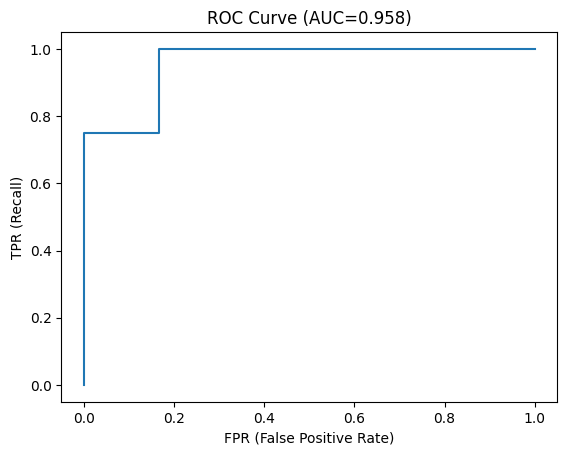

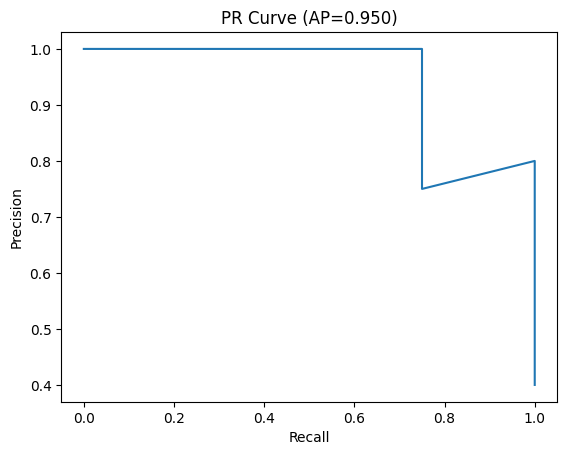

Positive rate (baseline for PR) = 0.400


In [4]:
from sklearn.metrics import (
    roc_curve, roc_auc_score,
    precision_recall_curve, average_precision_score
)

# ROC: (FPR, TPR) + AUC
fpr, tpr, roc_th = roc_curve(y_true, proba)
auc = roc_auc_score(y_true, proba)

plt.figure()
plt.plot(fpr, tpr)
plt.xlabel("FPR (False Positive Rate)")
plt.ylabel("TPR (Recall)")
plt.title(f"ROC Curve (AUC={auc:.3f})")
plt.show()


# PR: (Recall, Precision) + AP
precision, recall, pr_th = precision_recall_curve(y_true, proba)
ap = average_precision_score(y_true, proba)

plt.figure()
plt.plot(recall, precision)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title(f"PR Curve (AP={ap:.3f})")
plt.show()